In [1]:
import numpy as np
import seaborn as sns
import warnings
import os
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Wildfire_emdat.csv")

In [4]:
df.head()

,Unnamed: 0,Dis No,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Entry Criteria,Country,...,Dis Mag Scale,Start Year,Start Month,End Year,End Month,Total Deaths,No Affected,Total Affected,Total Damages ('000 US$),CPI
0,11,1990-0269-AUS,1990,269,Natural,Climatological,Wildfire,"Land fire (Brush, Bush, Pasture)",OFDA,Australia,...,Km2,1990,1,1990,1,15,1500,0,0,51.106795
1,147,1991-0126-COL,1991,126,Natural,Climatological,Wildfire,Forest fire,Declar/Int,Colombia,...,Km2,1991,2,1991,2,15,1500,0,0,53.271157
2,159,1991-0295-ESP,1991,295,Natural,Climatological,Wildfire,"Land fire (Brush, Bush, Pasture)",SigDam,Spain,...,Km2,1991,8,1991,8,15,1500,0,0,53.271157
3,200,1992-0503-CAN,1992,503,Natural,Climatological,Wildfire,Forest fire,Declar,Canada,...,Km2,1992,7,1992,7,15,1500,0,120000,54.884642
4,218,1992-0155-CRI,1992,155,Natural,Climatological,Wildfire,Forest fire,Affect,Costa Rica,...,Km2,1992,4,1992,4,15,1200,1200,0,54.884642


In [7]:
df.describe()

,Unnamed: 0,Year,Seq,Start Year,Start Month,End Year,End Month,Total Deaths,No Affected,Total Affected,Total Damages ('000 US$),CPI
count,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,3.130000e+02,3.130000e+02,3.130000e+02,313.000000
mean,5050.364217,2003.900958,324.683706,2003.900958,6.223642,2003.913738,6.571885,15.335463,2.112708e+04,2.068139e+04,2.906867e+05,74.379948
std,3153.986651,7.796270,186.592416,7.796270,2.875819,7.805461,2.831051,19.643928,1.840663e+05,1.841425e+05,1.346759e+06,13.307803
min,11.000000,1990.000000,1.000000,1990.000000,1.000000,1990.000000,1.000000,1.000000,9.000000e+00,0.000000e+00,0.000000e+00,51.106795
25%,2491.000000,1998.000000,178.000000,1998.000000,4.000000,1998.000000,4.000000,8.000000,1.500000e+03,0.000000e+00,0.000000e+00,63.760455
50%,4449.000000,2002.000000,306.000000,2002.000000,7.000000,2002.000000,7.000000,15.000000,1.500000e+03,1.920000e+02,0.000000e+00,70.357819
75%,7365.000000,2009.000000,444.000000,2009.000000,8.000000,2009.000000,8.000000,15.000000,1.500000e+03,1.410000e+03,5.400000e+04,84.215229
max,11592.000000,2019.000000,853.000000,2019.000000,12.000000,2020.000000,12.000000,240.000000,3.000000e+06,3.000000e+06,1.650000e+07,100.000000


In [9]:
df.dtypes

Unnamed: 0                    int64
Dis No                       object
Year                          int64
Seq                           int64
Disaster Group               object
Disaster Subgroup            object
Disaster Type                object
Disaster Subtype             object
Entry Criteria               object
Country                      object
ISO                          object
Region                       object
Continent                    object
Dis Mag Scale                object
Start Year                    int64
Start Month                   int64
End Year                      int64
End Month                     int64
Total Deaths                  int64
No Affected                   int64
Total Affected                int64
Total Damages ('000 US$)      int64
CPI                         float64
dtype: object

In [4]:
df.head()

,Unnamed: 0,Dis No,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Entry Criteria,Country,...,Dis Mag Scale,Start Year,Start Month,End Year,End Month,Total Deaths,No Affected,Total Affected,Total Damages ('000 US$),CPI
0,11,1990-0269-AUS,1990,269,Natural,Climatological,Wildfire,"Land fire (Brush, Bush, Pasture)",OFDA,Australia,...,Km2,1990,1,1990,1,15,1500,0,0,51.106795
1,147,1991-0126-COL,1991,126,Natural,Climatological,Wildfire,Forest fire,Declar/Int,Colombia,...,Km2,1991,2,1991,2,15,1500,0,0,53.271157
2,159,1991-0295-ESP,1991,295,Natural,Climatological,Wildfire,"Land fire (Brush, Bush, Pasture)",SigDam,Spain,...,Km2,1991,8,1991,8,15,1500,0,0,53.271157
3,200,1992-0503-CAN,1992,503,Natural,Climatological,Wildfire,Forest fire,Declar,Canada,...,Km2,1992,7,1992,7,15,1500,0,120000,54.884642
4,218,1992-0155-CRI,1992,155,Natural,Climatological,Wildfire,Forest fire,Affect,Costa Rica,...,Km2,1992,4,1992,4,15,1200,1200,0,54.884642


In [6]:
df.rename(columns = {'Total Damages (\'000 US$)':'Total Damages'}, inplace = True)

In [16]:
data[data['Total Damages'] == 0]

,Unnamed: 0,Dis No,Year,Seq,Disaster Type,Disaster Subtype,Entry Criteria,Country,ISO,Region,...,Dis Mag Scale,Start Year,Start Month,End Year,End Month,Total Deaths,No Affected,Total Affected,Total Damages,CPI
0,11,1990-0269-AUS,1990,269,Wildfire,"Land fire (Brush, Bush, Pasture)",OFDA,Australia,AUS,Australia and New Zealand,...,Km2,1990,1,1990,1,15,1500,0,0,51.106795
1,147,1991-0126-COL,1991,126,Wildfire,Forest fire,Declar/Int,Colombia,COL,South America,...,Km2,1991,2,1991,2,15,1500,0,0,53.271157
2,159,1991-0295-ESP,1991,295,Wildfire,"Land fire (Brush, Bush, Pasture)",SigDam,Spain,ESP,Southern Europe,...,Km2,1991,8,1991,8,15,1500,0,0,53.271157
4,218,1992-0155-CRI,1992,155,Wildfire,Forest fire,Affect,Costa Rica,CRI,Central America,...,Km2,1992,4,1992,4,15,1200,1200,0,54.884642
5,272,1993-0523-CHL,1993,523,Wildfire,Forest fire,Declar,Chile,CHL,South America,...,Km2,1993,1,1993,1,15,1500,0,0,56.504646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,10902,2019-0428-PRY,2019,428,Wildfire,Forest fire,SigDis,Paraguay,PRY,South America,...,Km2,2019,1,2019,8,15,1500,0,0,100.000000
303,10955,2017-0329-TUN,2017,329,Wildfire,Forest fire,Waiting,Tunisia,TUN,Northern Africa,...,Km2,2017,7,2017,8,15,2000,2000,0,95.878166
304,10973,2017-0252-USA,2017,252,Wildfire,Forest fire,Declar,United States of America (the),USA,Northern America,...,Km2,2017,7,2017,7,15,9,156,0,95.878166
306,10995,2017-0297-MNE,2017,297,Wildfire,Forest fire,Declar,Montenegro,MNE,Southern Europe,...,Km2,2017,7,2017,7,15,200,200,0,95.878166


In [17]:
cat_cols = ['Disaster Subtype','Entry Criteria','Country', 'Region','Continent']

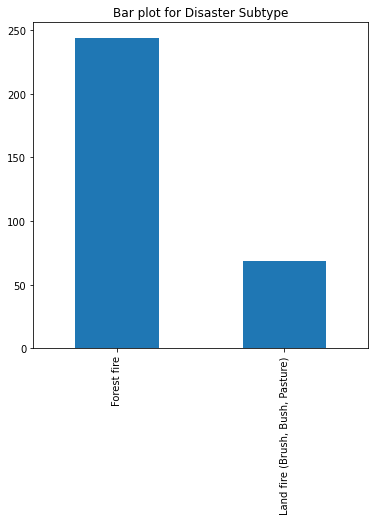

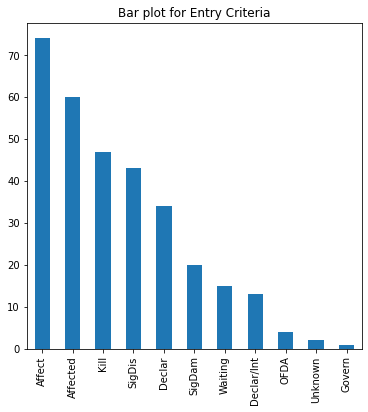

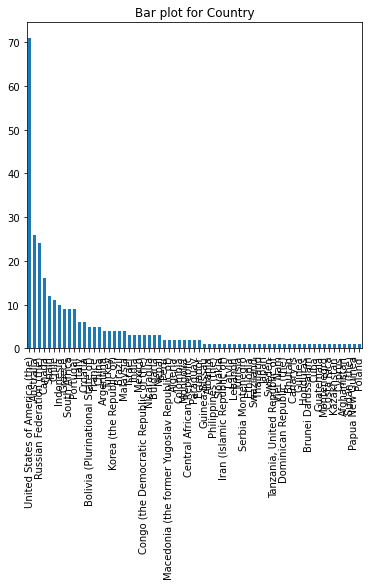

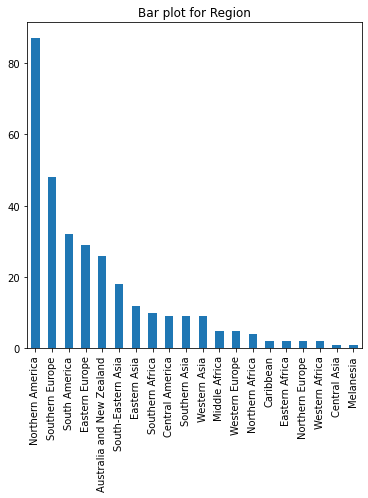

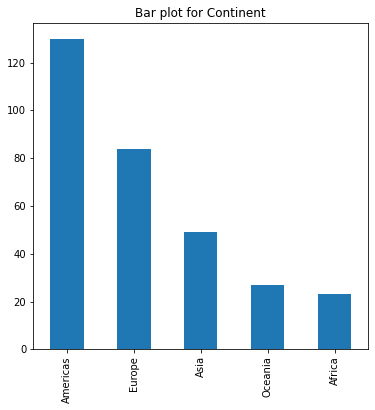

In [18]:
for col in cat_cols:
    fig = plt.figure(figsize=(6,6)) # define plot area
    ax = fig.gca() # define axis  
    
    counts = newdata[col].value_counts() # find the counts for each unique category
    counts.plot.bar(ax = ax) # Use the plot.bar method on the counts data frame
    ax.set_title('Bar plot for ' + col)

In [20]:
num_cols = ['Total Deaths', 'No Affected','Total Affected']

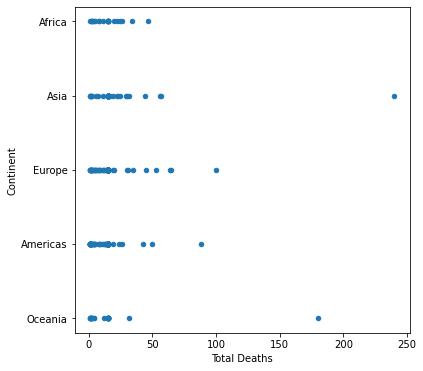

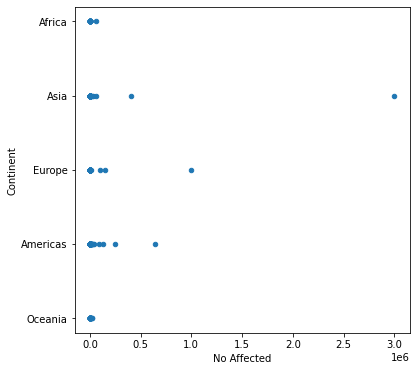

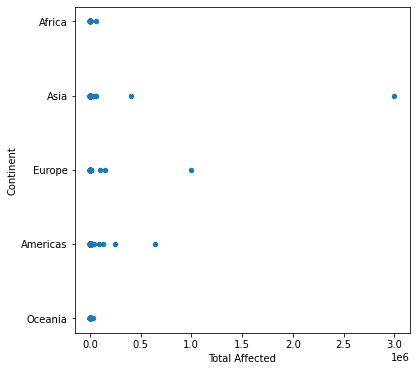

In [23]:
for col in num_cols:
    fig = plt.figure(figsize=(6,6)) # define plot area
    ax = fig.gca() # define axis  

    df.plot.scatter(x = col, y = 'Continent', ax = ax)

<AxesSubplot:>

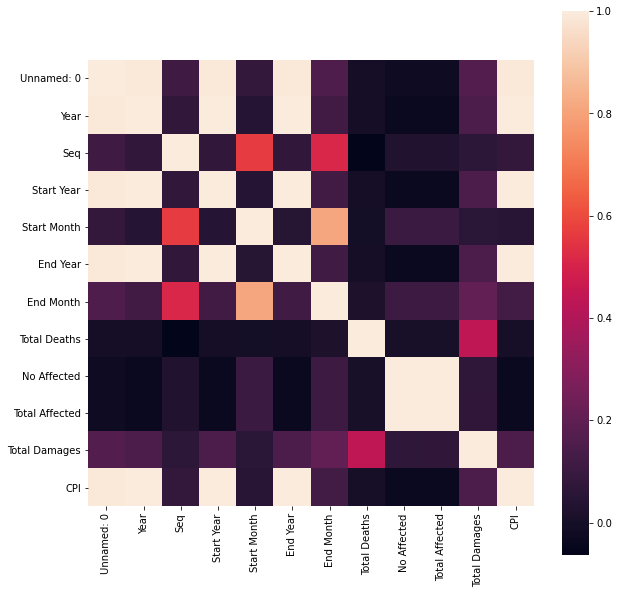

In [30]:
corrmat = data.corr()
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrmat, square=True)

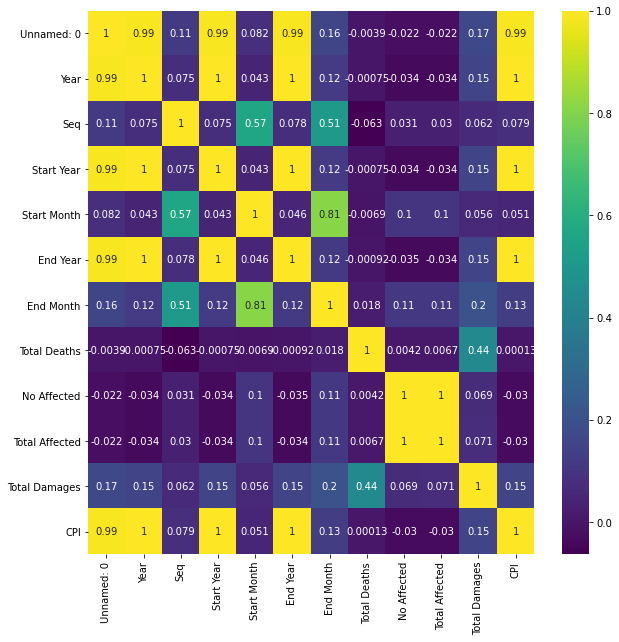

In [27]:
X = data.iloc[:,0:20] 
y = data.iloc[:,-2]    
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))

g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="viridis")

In [33]:
X = data.drop(['Dis No','Seq','Dis Mag Scale','Total Damages'],axis=1)
y = data['Total Damages']

In [34]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [8]:
df['Total Damages'] = df['Total Damages'].replace(0, np.nan)

In [9]:
df.head()

,Unnamed: 0,Dis No,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Entry Criteria,Country,...,Dis Mag Scale,Start Year,Start Month,End Year,End Month,Total Deaths,No Affected,Total Affected,Total Damages,CPI
0,11,1990-0269-AUS,1990,269,Natural,Climatological,Wildfire,"Land fire (Brush, Bush, Pasture)",OFDA,Australia,...,Km2,1990,1,1990,1,15,1500,0,NaN,51.106795
1,147,1991-0126-COL,1991,126,Natural,Climatological,Wildfire,Forest fire,Declar/Int,Colombia,...,Km2,1991,2,1991,2,15,1500,0,NaN,53.271157
2,159,1991-0295-ESP,1991,295,Natural,Climatological,Wildfire,"Land fire (Brush, Bush, Pasture)",SigDam,Spain,...,Km2,1991,8,1991,8,15,1500,0,NaN,53.271157
3,200,1992-0503-CAN,1992,503,Natural,Climatological,Wildfire,Forest fire,Declar,Canada,...,Km2,1992,7,1992,7,15,1500,0,120000.0,54.884642
4,218,1992-0155-CRI,1992,155,Natural,Climatological,Wildfire,Forest fire,Affect,Costa Rica,...,Km2,1992,4,1992,4,15,1200,1200,NaN,54.884642


In [10]:
df['Total Damages'] = np.log(df['Total Damages'])

In [11]:
data_onehot_encoded = df.copy()
data_onehot_encoded = pd.get_dummies(data_onehot_encoded, columns=['Disaster Subtype'])
df = pd.get_dummies(data_onehot_encoded, columns=['Entry Criteria'])
df = pd.get_dummies(df, columns=['Continent'])
data = pd.get_dummies(df, columns=['Region'])

data.head()

,Unnamed: 0,Dis No,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Country,ISO,Dis Mag Scale,...,Region_Northern America,Region_Northern Europe,Region_South America,Region_South-Eastern Asia,Region_Southern Africa,Region_Southern Asia,Region_Southern Europe,Region_Western Africa,Region_Western Asia,Region_Western Europe
0,11,1990-0269-AUS,1990,269,Natural,Climatological,Wildfire,Australia,AUS,Km2,...,0,0,0,0,0,0,0,0,0,0
1,147,1991-0126-COL,1991,126,Natural,Climatological,Wildfire,Colombia,COL,Km2,...,0,0,1,0,0,0,0,0,0,0
2,159,1991-0295-ESP,1991,295,Natural,Climatological,Wildfire,Spain,ESP,Km2,...,0,0,0,0,0,0,1,0,0,0
3,200,1992-0503-CAN,1992,503,Natural,Climatological,Wildfire,Canada,CAN,Km2,...,1,0,0,0,0,0,0,0,0,0
4,218,1992-0155-CRI,1992,155,Natural,Climatological,Wildfire,Costa Rica,CRI,Km2,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df.columns

Index(['Unnamed: 0', 'Dis No', 'Year', 'Seq', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Country', 'ISO', 'Region',
       'Dis Mag Scale', 'Start Year', 'Start Month', 'End Year', 'End Month',
       'Total Deaths', 'No Affected', 'Total Affected', 'Total Damages', 'CPI',
       'Disaster Subtype_Forest fire',
       'Disaster Subtype_Land fire (Brush, Bush, Pasture)',
       'Entry Criteria_Affect', 'Entry Criteria_Affected',
       'Entry Criteria_Declar', 'Entry Criteria_Declar/Int',
       'Entry Criteria_Govern', 'Entry Criteria_Kill', 'Entry Criteria_OFDA',
       'Entry Criteria_SigDam', 'Entry Criteria_SigDis',
       'Entry Criteria_Unknown', 'Entry Criteria_Waiting', 'Continent_Africa',
       'Continent_Americas', 'Continent_Asia', 'Continent_Europe',
       'Continent_Oceania'],
      dtype='object')

In [22]:
cols_2_remove = ['Disaster Subgroup', 'Disaster Type', 'Disaster Group']

df = df.drop(cols_2_remove, axis=1)

In [28]:
X = df.drop(['Total Damages','Dis No','Seq','Dis Mag Scale','Total Affected','Region','Country','ISO','Year','Start Year','End Year','Start Month','End Month'],axis=1)
y = df['Total Damages']

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [26]:
df['Total Damages'] = df['Total Damages'].replace(np.nan,0)

In [119]:
model = LinearRegression()
model.fit(X_train,y_train)
r_sq = model.score(X_train,y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.18719211217706355


In [32]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 11.884808387340076
slope: [ 1.15875483e-03  5.09416069e-02 -2.53274033e-08 -1.87145857e-01
 -4.72081470e-01  4.72081470e-01  5.54345042e-01  4.81886881e-01
 -8.21433710e-02 -1.30838086e+00  5.01669889e+00  7.72030680e-01
  1.00512054e+00  6.22344583e-01 -8.17332843e-01 -3.04770424e+00
 -3.19686531e+00 -3.90071998e+00  7.25338195e-01 -4.47783847e-01
 -2.11736748e-01  3.83490238e+00]


In [120]:
y_pred = model.predict(X_test)

In [36]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred, y_test)
R_square = model.score(X_test,y_test)
print('The Mean Square Error(MSE): ',mse)
print('R square:',R_square)

The Mean Square Error(MSE):  29.39133030148221
R square: 0.08243717667032535


In [178]:
import pickle
saved_model = pickle.dumps(model)
lr_from_pickle = pickle.loads(saved_model)
  
lr_from_pickle.predict(X_test)

array([ 4.5309458 ,  6.79088007,  6.73886824,  4.25006002,  3.0051801 ,
        1.77195435,  7.09493734,  2.76181539,  5.29512716,  4.60784814,
        5.61982978,  0.18674314,  3.25139349,  2.6616604 ,  4.6085056 ,
        3.52403973,  7.17779613,  8.55512358,  6.05518906,  5.73251593,
        3.92922855,  6.00497451, -0.48564702,  4.0991804 ,  4.93613329,
        4.99806709,  5.35438619,  3.99477678,  7.80434531,  2.2151191 ,
        4.34993987,  5.49286044,  0.23555567,  3.64106206,  3.85703569,
        5.15858205,  7.21323495,  6.92730177,  3.9896444 ,  3.04050787,
        6.48328748,  6.89419309,  1.38571196,  5.70037467,  0.6246932 ,
        2.10509335,  3.48031904, 10.283789  ,  3.00472133,  3.97242334,
        2.92221874,  1.16899214,  3.52765125,  4.82146146,  6.43850115,
        4.10884057,  4.05608876,  6.92074051,  2.75393963,  3.83599189,
        3.17493032,  8.11795086,  4.40618175])

In [39]:
def simple_linear_regression(input_feature, output):
    # compute the sum of input_feature and output
    Xi = input_feature
    Yi = output
    N = len(Xi)
    # compute the mean of input_feature and output
    Yi_mean = Yi.mean()
    Xi_mean = Xi.mean()
    
    # compute the product of the output and the input_feature and its sum
    S_YiXi = (Yi * Xi).sum()
    Yi_Xi_ByN = (Yi.sum() * Xi.sum()) / N
    
    # compute the squared value of the input_feature and its sum
    S_XiXi = (Xi * Xi).sum()
    XiXi_ByN = (Xi.sum() * Xi.sum()) / N
    
    # use the formula for the slope
    slope = (S_YiXi - Yi_Xi_ByN) / (S_XiXi - XiXi_ByN)
    
    # use the formula for the intercept
    intercept = Yi_mean - slope * Xi_mean
    
    return (intercept, slope)

In [49]:
sqft_intercept, sqft_slope = simple_linear_regression(X_train, df['Total Damages'])

print ("Intercept: " + str(sqft_intercept))
print ("Slope: " + str(sqft_slope))

Intercept: 0                               NaN
1                               NaN
2                               NaN
3                               NaN
4                               NaN
                            ...    
Entry Criteria_Unknown     4.525821
Entry Criteria_Waiting     4.738768
No Affected                4.535734
Total Deaths               7.662656
Unnamed: 0                18.802056
Length: 335, dtype: float64
Slope: 0                              NaN
1                              NaN
2                              NaN
3                              NaN
4                              NaN
                            ...   
Entry Criteria_Unknown   -5.654928
Entry Criteria_Waiting   -5.867875
No Affected              -0.000003
Total Deaths             -0.205454
Unnamed: 0               -0.002876
Length: 335, dtype: float64


In [121]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('std_scalar', StandardScaler())])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [122]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Unnamed: 0,1.158755e-03
Total Deaths,5.094161e-02
No Affected,-2.532740e-08
CPI,-1.871459e-01
Disaster Subtype_Forest fire,-4.720815e-01
"Disaster Subtype_Land fire (Brush, Bush, Pasture)",4.720815e-01
Entry Criteria_Affect,5.543450e-01
Entry Criteria_Affected,4.818869e-01
Entry Criteria_Declar,-8.214337e-02
Entry Criteria_Declar/Int,-1.308381e+00


In [123]:
pred = model.predict(X_test)

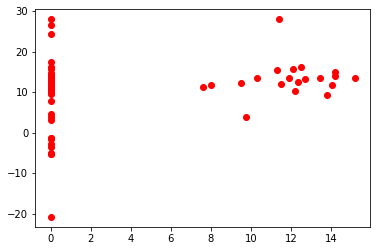

In [59]:
plt.scatter(y_test, pred,  color='red')
plt.show()

In [63]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def cross_val(model):
    pred = cross_val_score(model,X,y,cv=10)
    return pred.mean()

In [109]:
def print_evaluate(true, predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

# Linear Regression

In [110]:
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [124]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print_evaluate(y_test, test_pred)
print_evaluate(y_train, train_pred)

MAE: 8.710211996762892
MSE: 120.50175969660904
RMSE: 10.977329351741663
R2 Square -2.7619234552931626
__________________________________
MAE: 8.989184968406741
MSE: 141.10812286713656
RMSE: 11.878894008582472
R2 Square -3.101666206300165
__________________________________


In [125]:
resul = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
resul

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,8.710212,120.50176,10.977329,-2.761923,-0.226906


# Support Vector Regressor

In [126]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf').fit(X, y)

In [127]:
pred = regressor.predict(X_test)

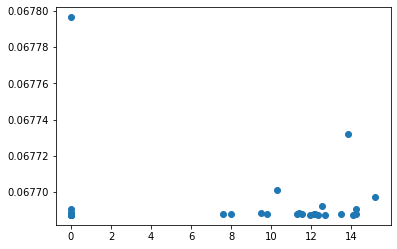

In [78]:
plt.scatter(y_test, pred)
plt.show()

In [128]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 8.710211996762892
MSE: 120.50175969660904
RMSE: 10.977329351741663
R2 Square -2.7619234552931626
__________________________________
Train set evaluation:
_____________________________________
MAE: 8.989184968406741
MSE: 141.10812286713656
RMSE: 11.878894008582472
R2 Square -3.101666206300165
__________________________________


In [129]:
res_1 = pd.DataFrame(data=[["Support vector regressor", *evaluate(y_test, test_pred) , cross_val(SVR())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
resul = resul.append(res_1, ignore_index=True)
resul

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,8.710212,120.50176,10.977329,-2.761923,-0.226906
1,Support vector regressor,8.710212,120.50176,10.977329,-2.761923,-0.703861


# Stochastic Gradient Descent

In [131]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=300,eta0 = 0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 4.705839853483687
MSE: 29.54224752976354
RMSE: 5.435278054503149
R2 Square 0.07772571799695172
__________________________________
Train set evaluation:
_____________________________________
MAE: 4.612740229380097
MSE: 28.6063083750276
RMSE: 5.348486549952949
R2 Square 0.168484946402908
__________________________________


In [132]:
res_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred) , 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
resul = resul.append(res_2, ignore_index=True)
resul

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,8.710212,120.501760,10.977329,-2.761923,-0.226906
1,Support vector regressor,8.710212,120.501760,10.977329,-2.761923,-0.703861
2,Stochastic Gradient Descent,4.705840,29.542248,5.435278,0.077726,0.000000


# Decision Tree Regressor

In [134]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0).fit(X, y)

In [136]:
regressor.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 4.705839853483687
MSE: 29.54224752976354
RMSE: 5.435278054503149
R2 Square 0.07772571799695172
__________________________________
Train set evaluation:
_____________________________________
MAE: 4.612740229380097
MSE: 28.6063083750276
RMSE: 5.348486549952949
R2 Square 0.168484946402908
__________________________________


In [137]:
res_3 = pd.DataFrame(data=[["Decision Tree Regressor", *evaluate(y_test, test_pred) , 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
resul = resul.append(res_3, ignore_index=True)
resul

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,8.710212,120.501760,10.977329,-2.761923,-0.226906
1,Support vector regressor,8.710212,120.501760,10.977329,-2.761923,-0.703861
2,Stochastic Gradient Descent,4.705840,29.542248,5.435278,0.077726,0.000000
3,Decision Tree Regressor,4.705840,29.542248,5.435278,0.077726,0.000000


# Polynomial Regressor

In [143]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=5)

X_train_5_d = poly_reg.fit_transform(X_train)
X_test_5_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_5_d,y_train)

test_pred = lin_reg.predict(X_test_5_d)
train_pred = lin_reg.predict(X_train_5_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 23745.223896250445
MSE: 6325189997.8945675
RMSE: 79531.0631004928
R2 Square -197465004.2594616
__________________________________
Train set evaluation:
_____________________________________
MAE: 3.4819495375870703e-09
MSE: 2.5212399891215015e-17
RMSE: 5.021195066039061e-09
R2 Square 1.0
__________________________________


In [144]:
res_4 = pd.DataFrame(data=[["polynomial Regressor", *evaluate(y_test, test_pred) , 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
resul = resul.append(res_4, ignore_index=True)
resul

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,8.710212,1.205018e+02,10.977329,-2.761923e+00,-0.226906
1,Support vector regressor,8.710212,1.205018e+02,10.977329,-2.761923e+00,-0.703861
2,Stochastic Gradient Descent,4.705840,2.954225e+01,5.435278,7.772572e-02,0.000000
3,Decision Tree Regressor,4.705840,2.954225e+01,5.435278,7.772572e-02,0.000000
4,polynomial Regressor,23745.223896,6.325190e+09,79531.063100,-1.974650e+08,0.000000


# Random Forest Regressor

In [148]:
from  sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=2000, random_state=0).fit(X, y)

In [149]:
regressor.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 4.705839853483687
MSE: 29.54224752976354
RMSE: 5.435278054503149
R2 Square 0.07772571799695172
__________________________________
Train set evaluation:
_____________________________________
MAE: 4.612740229380097
MSE: 28.6063083750276
RMSE: 5.348486549952949
R2 Square 0.168484946402908
__________________________________


In [ ]:
res_5 = pd.DataFrame(data=[["Random forest Regressor", *evaluate(y_test, test_pred) , 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
resul = resul.append(res_5, ignore_index=True)
resul

# TheilSen Regressor (Robust Regression)

In [154]:
from sklearn.linear_model import TheilSenRegressor
tr = TheilSenRegressor().fit(X, y)

In [156]:
test_pred = tr.predict(X_test)
train_pred = tr.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 6.1435137391876715
MSE: 58.280994892748794
RMSE: 7.634199034132448
R2 Square -0.8194642321976187
__________________________________
Train set evaluation:
_____________________________________
MAE: 6.248914265214894
MSE: 55.82774079246986
RMSE: 7.471796356464077
R2 Square -0.6227751679339277
__________________________________


In [158]:
res_6 = pd.DataFrame(data=[["Robust Regression", *evaluate(y_test, test_pred) , cross_val(TheilSenRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
resul = resul.append(res_6, ignore_index=True)
resul

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,8.710212,1.205018e+02,10.977329,-2.761923e+00,-0.226906
1,Support vector regressor,8.710212,1.205018e+02,10.977329,-2.761923e+00,-0.703861
2,Stochastic Gradient Descent,4.705840,2.954225e+01,5.435278,7.772572e-02,0.000000
3,Decision Tree Regressor,4.705840,2.954225e+01,5.435278,7.772572e-02,0.000000
4,polynomial Regressor,23745.223896,6.325190e+09,79531.063100,-1.974650e+08,0.000000
5,Random forest Regressor,4.705840,2.954225e+01,5.435278,7.772572e-02,0.000000
6,Robust Regression,6.143514,5.828099e+01,7.634199,-8.194642e-01,-3.786393


# Ridge Regressor

In [161]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, tol=0.0005, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 4.977994085664748
MSE: 29.86963108812637
RMSE: 5.465311618574587
R2 Square 0.06750518768948344
__________________________________
Train set evaluation:
_____________________________________
MAE: 4.844645028614405
MSE: 28.4568710833694
RMSE: 5.334498203521059
R2 Square 0.17282872106804614
__________________________________


In [162]:
res_7 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
resul = resul.append(res_7, ignore_index=True)
resul

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,8.710212,1.205018e+02,10.977329,-2.761923e+00,-0.226906
1,Support vector regressor,8.710212,1.205018e+02,10.977329,-2.761923e+00,-0.703861
2,Stochastic Gradient Descent,4.705840,2.954225e+01,5.435278,7.772572e-02,0.000000
3,Decision Tree Regressor,4.705840,2.954225e+01,5.435278,7.772572e-02,0.000000
4,polynomial Regressor,23745.223896,6.325190e+09,79531.063100,-1.974650e+08,0.000000
5,Random forest Regressor,4.705840,2.954225e+01,5.435278,7.772572e-02,0.000000
6,Robust Regression,6.143514,5.828099e+01,7.634199,-8.194642e-01,-3.786393
7,Ridge Regression,4.977994,2.986963e+01,5.465312,6.750519e-02,-0.220127


# ElasticNet Regressor

In [165]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 4.903651047613865
MSE: 29.918459817839558
RMSE: 5.469776944066326
R2 Square 0.06598081207818352
__________________________________
Train set evaluation:
_____________________________________
MAE: 4.759160114879305
MSE: 28.18552692778352
RMSE: 5.309004325462875
R2 Square 0.18071602854992352
__________________________________


In [166]:
res_8 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
resul = resul.append(res_8, ignore_index=True)
resul

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,8.710212,1.205018e+02,10.977329,-2.761923e+00,-0.226906
1,Support vector regressor,8.710212,1.205018e+02,10.977329,-2.761923e+00,-0.703861
2,Stochastic Gradient Descent,4.705840,2.954225e+01,5.435278,7.772572e-02,0.000000
3,Decision Tree Regressor,4.705840,2.954225e+01,5.435278,7.772572e-02,0.000000
4,polynomial Regressor,23745.223896,6.325190e+09,79531.063100,-1.974650e+08,0.000000
5,Random forest Regressor,4.705840,2.954225e+01,5.435278,7.772572e-02,0.000000
6,Robust Regression,6.143514,5.828099e+01,7.634199,-8.194642e-01,-3.786393
7,Ridge Regression,4.977994,2.986963e+01,5.465312,6.750519e-02,-0.220127
8,Elastic Net Regression,4.903651,2.991846e+01,5.469777,6.598081e-02,-0.232356


# LightGBM Regressor

In [168]:
!pip install lightgbm

In [173]:
import lightgbm as lgb
lgb_model = lgb.LGBMRegressor(n_estimators=300, max_depth=2, bagging_fraction=0.9, random_state=42)

In [174]:
lgb_model.fit(X_train, y_train)

test_pred = lgb_model.predict(X_test)
train_pred = lgb_model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
Test set evaluation:
_____________________________________
MAE: 5.039132349963279
MSE: 34.836223802365595
RMSE: 5.902221937742226
R2 Square -0.08754600551819935
__________________________________
Train set evaluation:
_____________________________________
MAE: 3.433834938301414
MSE: 16.78844443942329
RMSE: 4.097370429851723
R2 Square 0.5120011958605131
__________________________________


In [176]:
res_9 = pd.DataFrame(data=[["LightGBM Regression", *evaluate(y_test, test_pred) , 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
resul = resul.append(res_9, ignore_index=True)
resul

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,8.710212,1.205018e+02,10.977329,-2.761923e+00,-0.226906
1,Support vector regressor,8.710212,1.205018e+02,10.977329,-2.761923e+00,-0.703861
2,Stochastic Gradient Descent,4.705840,2.954225e+01,5.435278,7.772572e-02,0.000000
3,Decision Tree Regressor,4.705840,2.954225e+01,5.435278,7.772572e-02,0.000000
4,polynomial Regressor,23745.223896,6.325190e+09,79531.063100,-1.974650e+08,0.000000
5,Random forest Regressor,4.705840,2.954225e+01,5.435278,7.772572e-02,0.000000
6,Robust Regression,6.143514,5.828099e+01,7.634199,-8.194642e-01,-3.786393
7,Ridge Regression,4.977994,2.986963e+01,5.465312,6.750519e-02,-0.220127
8,Elastic Net Regression,4.903651,2.991846e+01,5.469777,6.598081e-02,-0.232356
9,LightGBM Regression,5.039132,3.483622e+01,5.902222,-8.754601e-02,0.000000


In [179]:
import pickle
filename = 'wildfire_modeling.pkl'
pickle.dump(model, open(filename, 'wb'))